# k-means Clustering dan the Lloyd's Algorithm

Algoritma clustering (pengelompokan) adalah kategori algoritma unsupervised learning (pembelajaran tanpa pengawasan) yang berupaya mempelajari pengelompokan titik data secara optimal. Salah satu algoritma pengelompokan yang paling banyak digunakan  *k-means*. Algoritma k-means merupakan contoh populer dari masalah NP-hard, yang solusinya tidak diketahui. Untungnya, sebuah metode dengan nama *algoritma Lloyd* diketahui dapat mencapai titik minimum lokal dari solusi (bukan titik minimum global) dan dapat sangat berguna dalam banyak kasus.

Pertama-tama kami membuat beberapa sampel data simulasi menggunakan fungsi `make_blobs` yang tersedia di Scikit-Learn.

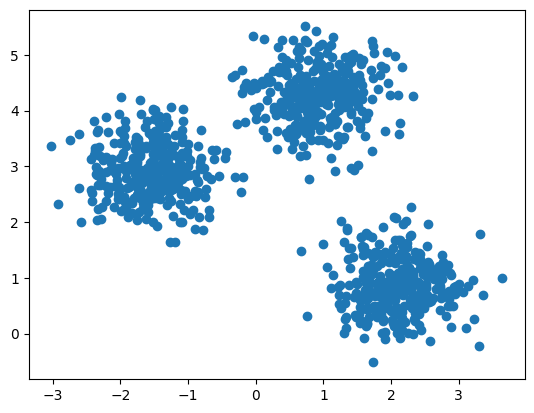

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

N = 1000

x, y = make_blobs(n_samples=N, centers=3, cluster_std=0.5, random_state=0)
plt.scatter(x[:, 0], x[:, 1]);

Seperti yang ditunjukkan oleh namanya, algoritma pengelompokan k-means berupaya menemukan '*means*' atau '*centroids*' untuk setiap cluster sebanyak k. Di sini, misalkan kita mendefinisikan tiga centroid yang diinisialisasi secara acak.

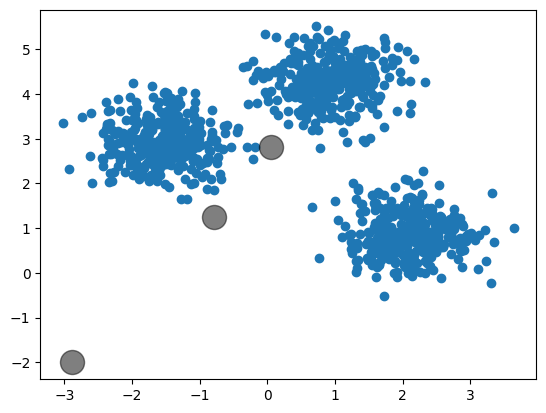

In [2]:
import numpy as np

K = 3    # user-defined parameter k

centroids = np.random.uniform(-3, 3, size=(K, 2))
plt.scatter(x[:, 0], x[:, 1]);
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=300, alpha=0.5);

Dengan centroid yang diinisialisasi seperti di atas, kita sekarang dapat mengevaluasi keanggotaan klaster setiap titik data berdasarkan jaraknya ke centroid.

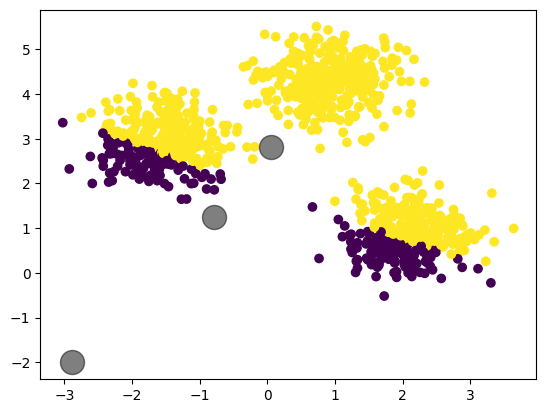

In [3]:
y_pred = -np.ones(N)
for i in range(N):
  d = np.zeros(K)
  for j in range(K):
    d[j] = np.sqrt(np.sum((x[i] - centroids[j])**2))
  y_pred[i] = np.argmin(d)


plt.scatter(x[:, 0], x[:, 1], c = y_pred);
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=300, alpha=0.5);

Sekarang, berdasarkan keanggotaan klaster, kita akan memperbarui posisi centroid: ke pusat klaster yang sebenarnya, bukan posisi yang diinisialisasi secara acak. Kode di bawah ini melakukan pembaruan:

<ipython-input-4-9b9d86df116f>:8: RuntimeWarning: invalid value encountered in divide
  centroids[i] /= np.sum(y_pred == i)


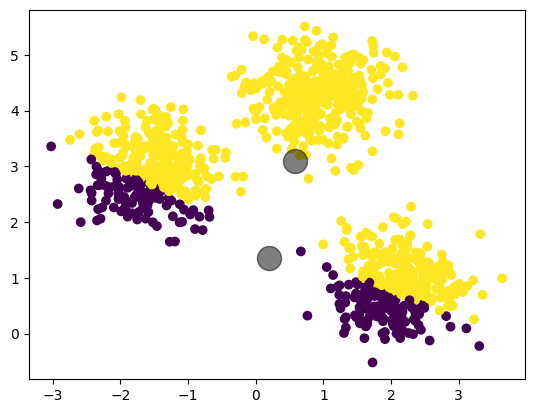

In [4]:
for i in range(K):
  centroids[i] = [0, 0]

for i in range(N):
  centroids[ int(y_pred[i]) ] += x[i]

for i in range(K):
  centroids[i] /= np.sum(y_pred == i)

plt.scatter(x[:, 0], x[:, 1], c = y_pred);
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=300, alpha=0.5);

Sekarang, perpindahan titik pusat menyebabkan perubahan keanggotaan grup. Jadi, kita salin dan tempel kode keanggotaan grup beberapa sel di atas dan gunakan kembali di bawah. Perhatikan keanggotaan yang diperbarui.

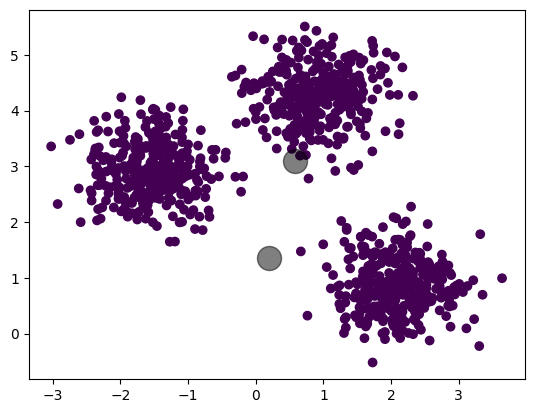

In [5]:
y_pred = -np.ones(N)
for i in range(N):
  d = np.zeros(K)
  for j in range(K):
    d[j] = np.sqrt(np.sum((x[i] - centroids[j])**2))
  y_pred[i] = np.argmin(d)


plt.scatter(x[:, 0], x[:, 1], c = y_pred);
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=300, alpha=0.5);

Sekali lagi, perubahan keanggotaan grup memerlukan pembaruan lokasi centroid. Mirip dengan yang di atas, kita akan menyalin dan menempel kode yang sama persis dengan yang kita gunakan sebelumnya.

<ipython-input-6-9b9d86df116f>:8: RuntimeWarning: invalid value encountered in divide
  centroids[i] /= np.sum(y_pred == i)


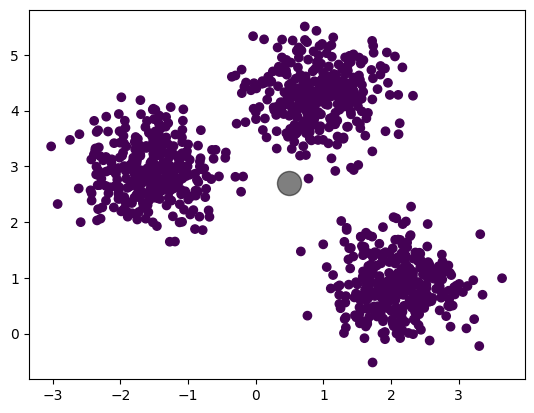

In [6]:
for i in range(K):
  centroids[i] = [0, 0]

for i in range(N):
  centroids[ int(y_pred[i]) ] += x[i]

for i in range(K):
  centroids[i] /= np.sum(y_pred == i)

plt.scatter(x[:, 0], x[:, 1], c = y_pred);
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=300, alpha=0.5);

Anda mungkin sekarang menyadari bahwa kluster sedang diperbarui dan algoritme mulai mengelompokkan data dengan benar. Dengan demikian, algoritme pengelompokan k-means (algoritme Lloyd) hanyalah pengulangan pembaruan keanggotaan dan pembaruan centroid secara bolak-balik. Oleh karena itu, kita dapat memperoleh manfaat dari memodifikasi sel kode di atas menjadi fungsi:

In [7]:
# Tugas: Buat fungsi untuk memodularisasi langkah-langkah algoritma Lloyd di atas.
def update_membership(points, centers): # update keanggotaan
  N = points.shape[0]
  K = centers.shape[0]
  clusters = -np.ones(N)

  for i in range(N):
    distances = np.zeros(K)
    for j in range(K):
      distances[j] = np.sqrt(np.sum((points[i] - centers[j])**2))
    clusters[i] = np.argmin(distances)

  return clusters

def update_centroids(points, clusters): # update centroid
  K = int(np.max(clusters)) + 1
  centers = np.zeros((K, points.shape[1]))

  for i in range(K):
    cluster_points = points[clusters == i]
    centers[i] = np.mean(cluster_points, axis=0)

  return centers

def plot_clusters(points, clusters, centers):
  plt.scatter(points[:, 0], points[:, 1], c = clusters);
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

Sekarang, dengan fungsi yang didefinisikan di atas, kita dapat menjalankan sel di bawah ini beberapa kali (tekan tombol di sebelah kiri) untuk melengkapi algoritma Lloyd. Setiap kali anda menjalankannya, lihat bagaimana klaster diperbarui.

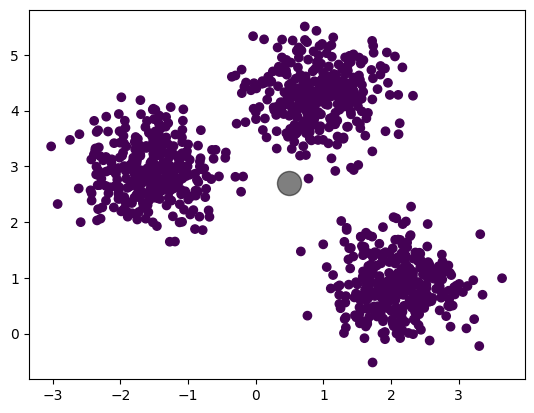

In [8]:
y_pred = update_membership(x, centroids)
centroids = update_centroids(x, y_pred)
plot_clusters(x, y_pred, centroids)

Terakhir, kita hanya perlu satu komponen lagi: beberapa kriteria untuk memeriksa kapan harus mengakhiri iterasi.

**Tugas** Cari kriteria konvergensi algoritma Lloyd secara daring. Terapkan fungsi bernama `kmeans(points, k)` yang secara internal memanggil fungsi `update_membership` dan `update_centroids` di atas, berulang kali. Dalam implementasi, biarkan fungsi menentukan kapan konvergensi tercapai dan diakhiri.

In [9]:
def kmeans(points, k, max_iter=100, tol=1e-4):
    # Initialize centroids randomly
    centroids = points[np.random.choice(points.shape[0], k, replace=False)]

    for i in range(max_iter):
        # Update cluster assignments
        clusters = update_membership(points, centroids)

        # Update centroids
        new_centroids = update_centroids(points, clusters)

        # Check for convergence
        if np.sum(np.abs(new_centroids - centroids)) < tol:
            break

        centroids = new_centroids

    return clusters, centroids

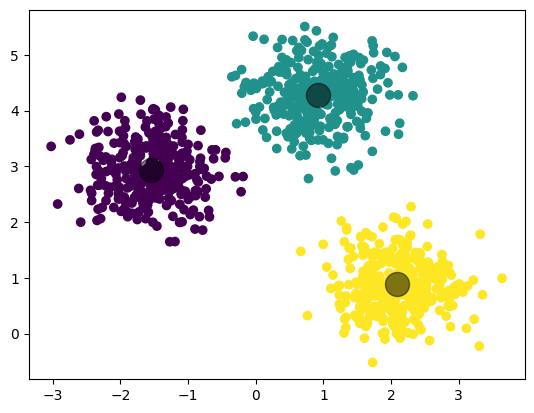

In [10]:
clusters, centroids = kmeans(x, K)  # Where x is your data and K is the number of clusters

# Visualize the clusters
plot_clusters(x, clusters, centroids)

# Introduction to Artificial Neural Networks

`Jaringan saraf tiruan (JST)` telah ada sejak tahun 1950-an, tetapi baru-baru ini popularitasnya meningkat. JST, dalam beberapa hal, merupakan rangkaian sistem persamaan linear yang terhubung melalui *grafik komputasional*. Blok blok penyusun JST adalah lapisan jaringan saraf, yang mewakili unit yang terdiri dari sistem persamaan linear. Dengan menghubungkan lapisan-lapisan ini, Anda dapat "merancang" arsitektur model jaringan saraf.

## 1. TensorFlow

Ada banyak paket perangkat lunak dengan fungsi jaringan saraf yang telah ditetapkan sebelumnya. Salah satu paket jaringan saraf yang paling populer adalah `TensorFlow`. TensorFlow awalnya dirancang sebagai proyek internal di Google, tetapi menjadi proyek sumber terbuka sejak 2015. Sejak saat itu, dengan maraknya penelitian pembelajaran mendalam, TensorFlow telah digunakan secara aktif oleh komunitas penelitian dan industri, yang memungkinkan terciptanya sejumlah besar proyek. Di lab ini, kita akan membahas beberapa dasar TensorFlow.

### 1.1. Instalasi
(JIKA ANDA MENGGUNAKAN COLAB, ANDA DAPAT MELEWATI LANGKAH INI)

Untuk instalasi TensorFlow, dalam kebanyakan kasus, Anda cukup mengetik `pip install tensorflow`. Tersedia versi TensorFlow yang dipercepat GPU, dan dapat diinstal melalui `pip install tensorflow-gpu`. Untuk instalasi GPU, Anda perlu menginstal CUDA dan CuDNN di komputer Anda. Untuk detailnya, lihat https://www.tensorflow.org/install. TensorFlow adalah pustaka besar dengan banyak dependensi dan subpaket, jadi instalasinya mungkin memerlukan waktu yang lama.

In [ ]:
# Anda TIDAK perlu menjalankan sel ini jika Anda menjalankan notebook ini di Colab.

# Ini memerlukan waktu. Bersabarlah...
!pip install tensorflow
#!pip install tensorflow-gpu # untuk menginstal versi GPU, jalankan baris di ini dan ubah baris di atas menjadi komentar.

### 1.2. Memulai
TensorFlow dapat diimpor hanya dengan memanggil `import tensorflow as tf`.

In [11]:
import tensorflow as tf
tf.__version__

'2.17.1'

Sampai batas tertentu, TensorFlow mirip dengan NumPy:

In [12]:
a = 3
b = 4
c = tf.add(a, b)
print(c)

tf.Tensor(7, shape=(), dtype=int32)


Perhatikan bahwa tipe pengembalian kode di atas adalah `tf.Tensor`. Secara matematis, tensor adalah generalisasi vektor dan matriks ke dimensi yang berubah-ubah. Banyak komputasi jaringan saraf yang diformulasikan berdasarkan tensor. Untuk mengonversi nilai tensor ke array numpy, Anda dapat memanggil:

In [13]:
c.numpy()

7

## 2. Pengenalan Digit Tulis Tangan MNIST

Kumpulan Data Digit Tulis Tangan (MNIST) dari National Institute of Science and Technology yang dimodifikasi adalah salah satu kumpulan data "hello world" yang paling populer bagi para ilmuwan data. Kumpulan data ini terdiri dari 60.000 gambar pelatihan digit tulisan tangan (0~9) dan 15.000 gambar uji di atasnya. TensorFlow menyediakan serangkaian kode untuk memfasilitasi pemuatan kumpulan data MNIST seperti di bawah ini.

In [14]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255.0   # normalize pixel value interval from 0~255 (common convention) to 0~1
X_test = X_test / 255.0     # normalize pixel value interval from 0~255 (common convention) to 0~1

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Anda dapat memeriksa apakah kumpulan data dimuat dengan benar dengan menampilkan gambar:

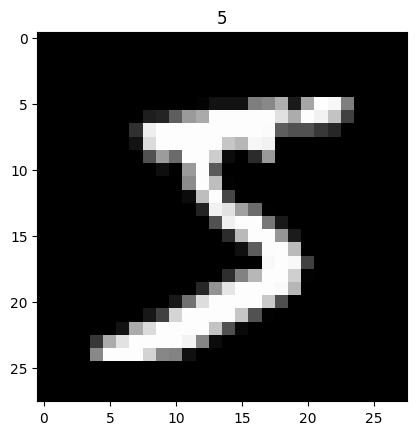

In [15]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
plt.title(Y_train[0])
plt.show()

Sekarang, di TensorFlow, mendefinisikan model jaringan saraf semudah "menambahkan" layer:

In [16]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Flatten(input_shape=(28,28)) )
model.add( tf.keras.layers.Dense(200, activation='sigmoid') )
model.add( tf.keras.layers.Dense(10, activation='sigmoid') )
model.summary()  # this prints out the summary of the model. (optional)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │         157,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,010 (621.13 KB)

 Trainable params: 159,010 (621.13 KB)

 Non-trainable params: 0 (0.00 B)

Setelah model didefinisikan, Anda perlu mengompilasi dan menyesuaikannya. `kompilasi` adalah proses menentukan pengaturan pelatihan, seperti jenis algoritme pengoptimalan, tujuan pelatihan, metrik yang akan ditampilkan, dsb. `penyesuaian` adalah proses saat penyetelan parameter jaringan neural yang sebenarnya terjadi. Untuk cakupan kursus ini, berikut saya tunjukkan pengaturan yang sangat mendasar.

In [17]:
model.compile('SGD', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.5668 - loss: 1.8104
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8445 - loss: 0.7350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8693 - loss: 0.5336
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8843 - loss: 0.4456
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8861 - loss: 0.4122


Sekarang, pelatihan berhasil, dengan akurasi yang cukup baik. Mari kita uji apakah model berfungsi dengan baik. Ini dapat dilakukan hanya dengan meneruskan serangkaian gambar ke fungsi bernama `predict`. Perhatikan bahwa, menurut konvensi, `predict` tidak menerima satu gambar, tetapi serangkaian gambar.

In [18]:
predicted = model.predict(X_test[0:1])   # predicted probabilities for each digit
print(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
[[0.42290443 0.033757   0.3333924  0.86416847 0.169057   0.47380385
  0.0077134  0.9997073  0.19647312 0.93852305]]


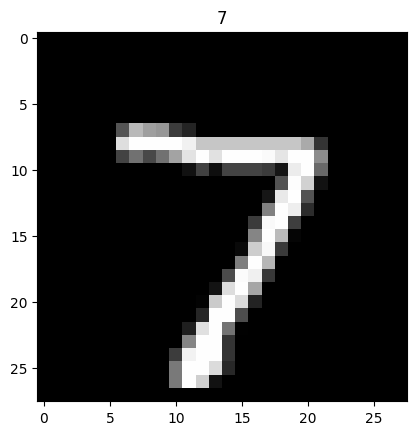

In [19]:
import numpy as np
plt.imshow(X_test[0], cmap='gray')
plt.title(np.argmax(predicted))
plt.show()

Akhirnya, kinerja model secara keseluruhan pada keseluruhan set data uji dapat dicapai dengan memanggil fungsi `evaluate`.

In [20]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8829 - loss: 0.4160


[0.3654080033302307, 0.9006999731063843]